<a href="https://colab.research.google.com/github/navas604/Ciencia-de-Datos-en-Python/blob/main/Tarea%20No.%205%20-%20Vectores%20y%20Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Galileo**
## **Maestría en Data Science**
## **Ciencia de Datos en Python**
## **Antonio Everardo Navas Contreras, 14003163**
## **17/03/2021**

---

## **Tarea No. 5 - Vectores y Numpy**

---

# NumPy y algebra lineal(parte 1) 


* Su nombre se deriva de Numeric Python
* Es una libreria amplia:   user guide de casi 200 pagina, reference manual mas de 1500
    * np. <tab> para ver opciones
    * np.lookfor? , help(np.lookfor)
    * np.lookfor(“cosine”)
    * np.cos? , help(np.cos)
* Paquete fundamental de computación científica en Python y báse para otros paquetes mas específicos y/o avanzados
* Performance superior, parecido a lenguajes compilados con la facilidad de Python
* ndarrays :  tipo básico de objeto, corresponde al tipo de objeto matemático conocido como Tensor
    * Arreglos multidimensionales
    * Mutables como las listas
    * Podemos hacer indexing y slicing sobre ellos

* Tipo de dato y tamaño fijado en creación lo cual le permite aplicar optimizaciones: El usar el mismo tipo y tamaño definido permite asegurar que todos los objetos utilizan el mismo tamaño de memoria y esto permite realizar muchas operaciones pre-compiladas de C. Esto permite realizar operaciones mucho mas efcientemente y con menos código que con listas.
* Operaciones vectorizadas vs por ciclos como ventaja de numpy(simplicidad y eficiencia) **Nota**: Siempre usar vectorizacion en el curso y en la carrera.

## ¿Por que estudiamos en ciencia de datos álgebra lineal?

Algebra lineal es una bella rama de la matemáticas que tiene muchas aplicaciones en diversas áreas, en ciencias de la computación y ciencia de datos tiene también innumerables aplicaciones  pero existe un motivo por el cual se vuelve escencial :

**Todo algoritmo, modelo matemático, estadístico ,  AI , etc trabaja con números y colecciones de estos**, aún los modelos para variables categóricas transforman de algún modo estas a una representación numérica, en ciencia de datos llamamos **embedding** al proceso de convertir datos no numéricos a representaciones numéricas y a las estructuras de datos resultantes(comunmente vectores) **embeddings** .

Podemos pensar entonces que el algebra lineal y sus estructuras entonces nos proveen una **manera de representar y trabajar información en la computadora**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Components_stress_tensor.svg/300px-Components_stress_tensor.svg.png"/>

### Ejemplos:

* Computer Vision: imagenes son tensores
* NLP: palabras son vectores.

Algebra lineal por si solo es un campo amplio(algunas universidades dan 2 cursos de 1 semestre o mas del tema) y no podemos cubrir todo lo que nos gustaría en esta clase, pero existe gran variedad de recursos en internet y es un tema que agrega valor en tu carrera de data science, especialmente si tu interés principal es ML y AI. Por ejemplo:

* Uno de los algoritmos mas famosos de ML: support VECTOR machine
* Uno de los metodos mas populares de AI en la actualidad es "deep learning" que se basa en transformaciones lineales (multiplicación de matrices).
* Los frameworks mas populares de ML tienen al algebra lineal como elemento base:
    * TensorFlow incluso basa su nombre en la estructura básica: Tensor
    * PyTorch: en Pytorch, la estructura de datos básica es precisamente el Tensor
    

### ¿NumPy mas que algebra lineal?

Aun que NumPy se basa mucho y es muy útil para algebra lineal y estructuras de esta rama, también es útil para realizar otros tipos de operaciones numéricas y es la base  para otros paquetes mas específicos , por ejemplo podemos usar NumPy también para:

* Numeros aleatorios: NumPy provee capacidades para trabajar con números aleatorios y colecciones de esto, por ejemplo generación de numeros aleatorios de muchas distribuciones de probabiliad(muestreo/sampleo) escencial en estadística y modelación y simulación.
* Transormadas de Fourier
* Scipy: paquete basado en Python que extiende muchas de sus capacidades con capacidades adicionales como:
    * Integración y solución de ecuaciones diferenciales.
    * Encontrar raices de funciones y optimización numérica.
    * Algebra lineal adicional.
    
    
    
Para usar NumPy es necesario instalarlo, si usamos Anaconda debemos instalarlo en el ambiente deseado, en linea de comandos esto se gra facilmente con:

**conda install numpy**

# Instalar numpy desde el jupyter notebook en el ambiente actual de Anaconda
# esto puede ser realizado de manera tradicional con linea de comandos o Anaconda Navigator
import sys
!conda install --yes --prefix {sys.prefix} numpy

# ! ejecuta un comando del sistema desde el notebook, el comando ejecutado fue:
print("Comando ejecutado:conda install --yes --prefix {"+sys.prefix+"} numpy")

Para poder utilizar numpy debemos importar el paquete, es casi un estandar de la industria importarlo bajo el alias **"np"**

In [192]:
import numpy as np

## Escalares y Vectores (Arreglos de una dimension): 

La pieza clave y fundamental para el algebra lineal es el **vector** (pero aun que el vector es la base, hay un objeto mas general que este como veremos mas adelante.).

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/Seleccion_999_2003.png">

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/fisica_cs.png">

Matemáticamente el Tensor es la entidad mas general cuando hablamos de arreglos o colecciones de elementos y que comunmente representan coordenadas en un plano posiblemente multidimensional, por lo tanto al traducirlo a software científico un tensor es también la estructura mas general para trabajar ,y es la estructura de datos básica en la cual almacenaremos información, **NumPy logra esto a través del objeto ndarray**(tensorflow usa tf.Tensor, PyTorch usa  torch.Tensor).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Components_stress_tensor.svg/300px-Components_stress_tensor.svg.png"/>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4885fc71da8be5094bf42dd592882a4deb94ff90">



Ya que el tensor es el tipo general , los objetos con los que comunmente hemos trabajado como vectores y matrices deben ser un caso específico de tensores, por lo tanto podemos pensar que un tensor es: **una generalización de vectores y matrices que podemos conceptualizar o entender como una arreglo multidimensional**

Si todos estos son tensores, debe haber una propiedad de los tensores que los distinga, esta propiedad es llamada **rango del tensor** y se define como el número de indices o coordenadas necesarias para referenciar a un elemento del tensor así tenemos:

* Escalar: tensor de rango 0
* Vector: tensores de rango 1

Ilustración 1:

<img src="https://cdn-images-1.medium.com/max/1600/1*pUr-9ctuGamgjSwoW_KU-A.png">

Ilustración 2:

<img src="https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg">


Podemos pensar en 2 representaciones básicas de un vector:
* Gráfica: representando un punto en el espacio
* Lista de números : representando las coordenadas ,o compoenentes de el punto en el espacio correspondiente.

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/3d_vec.png">

En DS nos interesa mayormente la segunda representación,pero en algunos casos resulta útil utilizar la primera para poder visualizar patrones en datos que estemos analizando.

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/patron_eliptico.png">

**Nota**:Algunas operaciones no estan definidas matemáticamente  , pero NumPy las provee ya que resultan útiles en programación aún si no existen en matemática, por ejemplo: 
* Sumar un escalar a un vector.
* Multiplicar 2 vectores elemento por elemento.

### Rango y dimensión 

Como dijimos , ya que vectores y matrices son Tensores, necesitamos una característica que los distinga, esto es matemáticamente el **rango** del Tensor , en el mundo de NumPy obtenemos esto al usar la característica **ndim** sobre un Tensor dado.

Si pensamos en la representación gráfica podemos pensar que el rango nos indica cuantos "ejes" posee el espacio sobre el que se define el tensor ,y necesitamos un número por cada eje para especificar cierto vector,  desde la perspectiva de la colección de números esto nos indica cuantos indices necesitamos para especificar o acceder cierto punto.

La dimensión o forma del tensor nos indica cuantos elementos este puede almacenar distribuidas en cada uno de sus "ejes".

Para vectores, el rango  es 1 , y la dimensión es cuantos elementos el vector posee. 

Resumen
* ndim = entero indicando el rango de un tensor(cuantos ejes posee)
* shape = tupla indicando la forma(cuantos elementos posee el tensor en cada uno de sus ejes )

In [193]:
x = np.array([1,2,3,4,5,6])

print(x.ndim)
print(x.shape)
print(len(x.shape)) #forma de obtener el rango del tensor a partir de su dimension

1
(6,)
1


Por el momento estamos interesados en vectores, pero vale la pena ver como ndim y shape varían para una matriz.

In [194]:
x = np.array([[1,2,3],
              [4,5,6]])

print(x.ndim)
print(x.shape)
print(len(x.shape))  #forma de obtener el rango del tensor a partir de su dimension

2
(2, 3)
2


Tanto ndim como shape pueden ser usadas en cualquier expresión valida, por ejemplo asignarlas a variables 

In [195]:
forma_x = x.shape

print("Filas de x:",forma_x[0])
print("Columnas de x:",forma_x[1])

Filas de x: 2
Columnas de x: 3


### Constructores de vectores

NumPy provee diversas formas para crear o construir vectores, por ejemplo:
* np.linspace
* np.array
* np.arange
* np.zeros
* np.ones

Existen otras pero estas son posiblemente las mas comunes. Puedes consultar las otras disponibles en: https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

In [196]:
x = np.linspace(0,5,50,endpoint=True,retstep=False)

x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [197]:
x = np.linspace(0,5,50,False,retstep=False)

x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [198]:
xc,dx = np.linspace(0,5,50,endpoint=True,retstep=True)

print(xc,dx)
print(xc.shape)
print(xc.ndim)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] 0.10204081632653061
(50,)
1


In [199]:
x = np.linspace(0,5,5,True)

x

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

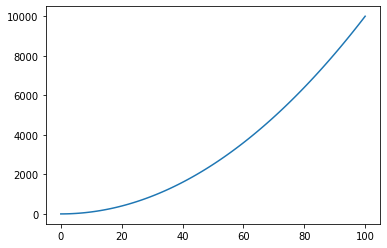

In [200]:
import matplotlib.pyplot as plt

x = np.linspace(0,100,100)
y = np.square(x)

plt.plot(x,y)
plt.show()

**np.arange**
Esta función es parecida a la función **range** que vimos en ciclos, pero genera un vector de NumPy que puede ser utilizdo en otras expresiones o ser asignado a variables para posterior uso.


arange(start=0,stop,step = 1,dtype=None) 

Intenta determinar el tipo de datos a partir de los parametros pero se puede sobreescribir si lo especificamos con dtype

In [201]:
yo = np.arange(1,10)
yoc = np.arange(2,10,dtype = float)

yo,yoc

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2., 3., 4., 5., 6., 7., 8., 9.]))

En muchos casos es útil crear vectores inicializados con 0s o 1s ,o bien cuando no nos importa su valor inicial podemos especificar que sean creados  como vácios.

Esto lo logramos con:
* np.zeros
* np.ones
* np.empty

In [202]:
np.array([0,0,0,0,0])

array([0, 0, 0, 0, 0])

In [203]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [204]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [205]:
np.empty(4)  # el valor varia, experimentemos cambiando el tipo con ndtype = <tipo>

array([ 54.  ,  36.  , 388.8 , 253.44])

**Vectores a partir de datos existentes**
Podemos también construir vectores  a partir de datos existentes(por ejempro listas de números, u otros vectores)  o bien especificar explicitamente con que valores queremos que un vector sea creado.

Esto lo logramos basicamente con 2 funciones(nuevamente existen otras a explorar):

* np.array
* np.copy

In [206]:
lista = [2,3,4.0]

x = np.array(lista)

x 

array([2., 3., 4.])

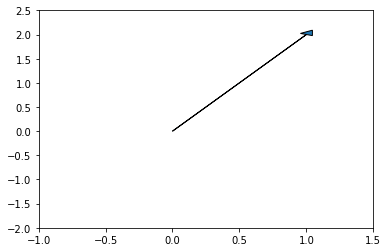

In [207]:
import matplotlib.pyplot as plt

a = np.array([1,2])

plt.arrow(0,0,a[0],a[1],head_width=0.1,head_length=0.1)
plt.xlim(-1,1.5)
plt.ylim(-2,2.5)
plt.show()

In [208]:
vector = np.array([1,2,3,4,5,6,7,8,9])

print(vector)

[1 2 3 4 5 6 7 8 9]


In [209]:
nuevo_vector = vector.copy()

print(nuevo_vector)

[1 2 3 4 5 6 7 8 9]


El siguiente ejemplo crea una copia de un vector m cambiando(truncando) su tipo de dato a entero.

In [210]:
m = np.linspace(9,1,11)

m_int = np.array(m,dtype = int)

m,m_int

(array([9. , 8.2, 7.4, 6.6, 5.8, 5. , 4.2, 3.4, 2.6, 1.8, 1. ]),
 array([9, 8, 7, 6, 5, 5, 4, 3, 2, 1, 1]))

**Construir vector como otro vector**

Existen algunas funiones que nos permiten crear vectores "como" otros vectores,es decir de la misma forma pero con posibles diferentes valores:


In [211]:
x = np.linspace(1,3,5)

ceros = np.zeros_like(x,dtype=int)
unos = np.ones_like(x)
vacio = np.empty_like(x)

print(x)
print(ceros)
print(unos)
print(vacio)

[1.  1.5 2.  2.5 3. ]
[0 0 0 0 0]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


En otros casos algunas funciones tambien devuelven un array  A de la misma forma de otro B pero con el resultado de aplicar alguna función a este, por ejemplo, el siguiente caso devuelve un nuevo vector con la forma de un vector "x" resultado de calcular el seno trigonoḿetrico sobre cada uno de sus elementos.:

In [212]:
np.sin(x) #operacion vectorizada


array([0.84147098, 0.99749499, 0.90929743, 0.59847214, 0.14112001])

In [213]:

for elemento in x:
  print(np.sin(elemento))

0.8414709848078965
0.9974949866040544
0.9092974268256817
0.5984721441039565
0.1411200080598672


Similar a la concatenación de listas (con +) podemos  concatenar 2 vectores y crear uno nuevo usando np.hstack((tupla))

In [214]:
#?np.hstack

In [215]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [216]:
# tu codigo aqui (~ 5 lineas de codigo):

x1 = np.linspace(0, 0.5, 6)
x2 = np.linspace(0.51, 0.59, 9)
x3 = np.linspace(0.6, 1, 5)

xs = np.hstack((x1, x2, x3))
print(xs)


[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


### Operaciones y Aritmetica Vectorial

Utiliza los operadores aritmeticos ya conocidos +,-,*,/, %

Las operaciones vectoriales básicas son:
* Sumar 2 vectores.
<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/suma_vec.png">
* Multiplicar 1 vector por un número: el efecto de esto es cambiar el tamaño del vector, es decir "escalarlo" y por eso en algebra lineal llamamos a un único número : **escalar**. El **span**,alcance o extención de un vector es el conjunto de todos los posibles vectores obtenidos por multiplicación escalar sobre este vector.
<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/mult_vec.png">

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/adicion_mult_escalar.png">

**Nota**:Algunas operaciones no estan definidas matemáticamente  , pero NumPy las provee ya que resultan útiles en programación aún si no existen en matemática, por ejemplo: 

* Multiplicar 2 vectores entre si
* Sumar 1 vector con un escalar

In [217]:
v = np.array([3,-5])
w = np.array([2,1])

c = v + w

print(c)

[ 5 -4]


In [218]:
2*v

array([  6, -10])

Esta operacion no esta definida en linalg

In [219]:
np.array([2,2])*v #producto haddamard (elemento a elemento)

array([  6, -10])

In [220]:
dos = np.array([2,2])
dos*v

array([  6, -10])

In [221]:
print(v)
print(w)

[ 3 -5]
[2 1]


In [222]:
resta = v - w #
multiplicacion = v*w
division = v/w
div_mod = v%w

print(resta)
print(multiplicacion)
print(division)
print(div_mod)

[ 1 -6]
[ 6 -5]
[ 1.5 -5. ]
[1 0]


Los operadores +=,-=,*=,/=,%=  , también son validos en vectores con NumPy y son mas eficientes, por ejemplo:

a+=b

Es mas eficiente que

a = a + b

Por lo tanto se recomienda usarlos siempre que sea posible :

In [223]:
a = np.array((1,2,3))
b = np.array((2,3,4))

In [224]:
a = a + b

In [225]:
a+=b
a

array([ 5,  8, 11])

Python utiliza un mecanismo conocido como **"broadcasting"** para algunas operaciones cuando el tamaño de los operandos no coincide, por ejemplo el caso de una suma entre un vector y un escalar, broadcasting "expande" el escalar para que tenga la misma forma que el vector (replicando el valor escalar) y luego aplica la operacion **"elementwise"** (elemento a elemento)

In [226]:
print(a)

[ 5  8 11]


In [227]:
a + 2 #operación no definida matemáticamente pero posible con broadcasting

array([ 7, 10, 13])

In [228]:
a -5 #operación no definida matemáticamente pero posible con broadcasting 

array([0, 3, 6])

In [229]:
a * 3 # operación si definida matemáticamente esta "escalando" el vector en factor de 3

array([15, 24, 33])

In [230]:
a

array([ 5,  8, 11])

In [231]:
# operacion no definida directamente pero ya que la division se reduce 
#a un producto por una fraccion, si esta definida a traves del "escalado"  dl vector en factor de 0.33333
a / 3 

array([1.66666667, 2.66666667, 3.66666667])

**Ejemplo aplicado a DS** :  Suavizado de curvas a través de promedios de n-puntos(medias móviles):

<img src="https://www.luisllamas.es/wp-content/uploads/2017/03/arduino-filtro-media-movil-ventana-5.png">

En el mundo la data comunmente posee "ruido" por lo cual muchas veces antes de hacer análisis o modelado se necesita "suavizar" las curvas para reducir este ruido, una técnica muy sencilla es  el suavizado por promedio de n-puntos(también llamado media móvil), esto significa que para cada punto Xn obtenemos una versión transformada(suavizada) que consiste en promediar n puntos cercanos a el, por ejemplo para n= 3 tenemos que:

$$XS_{n}  =  \frac{X_{n-1}+X_{n}+X_{n+1}}{3}$$

In [232]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

for n in range(1,len(y)-1): #5
    ys[n] = (y[n-1] + y[n] + y[n+1])/3
    
#print(y)
#print(ys)

In [233]:
ys = y

ys[2] = 5

print(y,ys)

[ 0.05813603  0.1931763   5.         ... -0.25362212  0.11165754
 -0.86726312] [ 0.05813603  0.1931763   5.         ... -0.25362212  0.11165754
 -0.86726312]


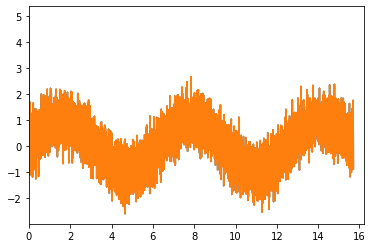

In [234]:
plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

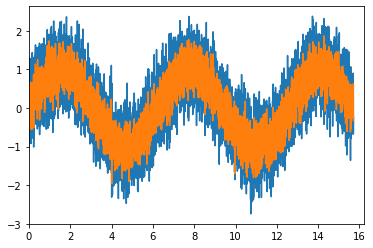

In [235]:

sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

def media_movil(a, n = 3):
    cumsum = np.cumsum(a, dtype=float)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    return (cumsum[n - 1:] / n)


ys = media_movil(y)


#ys = y

#ys[2] = 5

plt.plot(x,y)
plt.plot(x[1:-1],ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()


### Combinaciones lineales,span,vectores base,espacio vectorial e independencia lineal.

**Nota**: esta sección es de cierto relevante a futuro  ya que no es tan importante para este curso,pero lo será para futuros cursos y en tu carrera, por ejemplo en machine learning y estadística la reducción de dimensionalidad PCA se basa en el contenido acá resumido.

Derivado de las 2 operaciones básicas de algebra lineal que ya mencionamos: suma de 2 vectores y multiplicación de un escalar por un vector podemos hablar de **combinaciones lineales**

* **Combinación lineal** : Una combinación lineal es una generalización que combina estas 2 operaciones básicas y la podemos definir como **la suma de 2 o mas vectores escalados** , 

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/combinacion_base.png">

Combinación lineal

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/combinacion_lineal.png">

* El **span**(alceance, o extensión) de una combinacion lineal es el conjunto de todos los posibles vectores obtenidos para cada posible combinación de sus valores escalares.


<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/span.png">

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/3d_span.png">

* **Independencia Lineal** : si un vector A es un múltiplo de otro vector B, decimos que existe dependencia lineal entre ellos, geométricamente el efecto de esto es que el **span** de estos  es el mismo, o bien si se trata de combinaciones lineales, el agregar un vector dependientemente lineal significa que este puede ser obtenido como una combinación de los otros en la combinación ,esto no modifica el **span** de la combinación, por lo cual es redundante y no aporta nada.

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/dependencia_lineal.png">

<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/dependencia_lineal2.png">

**Referencia Util**:
https://youtu.be/k7RM-ot2NWY?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

### ufuncs(universal functions)

Ufuncs son funciones que trabajan de manera general independiente de la dimension del objeto al que sean aplicadas, esto significa que la misma función puede ser utilizada sobre valores **escalares**  o sobre **tensores** de cualquier dimensión. , cuando es aplicada sobre tensores esta trabaja elemento por elemento soportando "broadcasting" .

NumPy provee una gran colección de ufuncs comunes en ciencias y que serán muy útiles en data science, ya hemos usado algunas por ejemplo: **np.sin(tensor)** , muchas comunes y que te serán familares son:

* np.sign: determinar el signo de un número
* np.abs: valor absoluto de un número
* np.cos: coseno de un angulo en radianes
* np.sin : seno de un angulo en radianes
* np.tan : tangente de un angulo en radianes
* np.exp : función exponencial e** x
* np.log: logaritmo natural
* np.log10 : logaritmo base 10
* np.log2 : logaritmo base 2
* np.sqrt : raiz cuadrada
* np.power : potenciacion

Al trabajar una aplicación numérica/científica es recomendable tener a la mano la documentación de las funciones disponibles : https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.math.html

#### Nota: 
En algunos casos requeriremos crear nuestras propias funciones y es recomendable que se apeguen a las ufuncs, es decir que se puedan aplicar independiente de la dimensión del objeto al que se aplican, que soporten broadcasting y muy importante **que su definición evite ciclos y use operaciones vectorizadas y otras ufuncs** , esto será parte de los criterios de evaluación en tareas y exámenes en este curso.

In [236]:
x = np.array([-5.3,-1,0,1.5,10,100])

print(np.sign(x))
print(np.abs(x))
print(np.cos(x))
print(np.sin(x))
print(np.tan(x))
print(np.exp(x))
print(len(x))

[-1. -1.  0.  1.  1.  1.]
[  5.3   1.    0.    1.5  10.  100. ]
[ 0.55437434  0.54030231  1.          0.0707372  -0.83907153  0.86231887]
[ 0.83226744 -0.84147098  0.          0.99749499 -0.54402111 -0.50636564]
[ 1.5012734  -1.55740772  0.         14.10141995  0.64836083 -0.58721392]
[4.99159391e-03 3.67879441e-01 1.00000000e+00 4.48168907e+00
 2.20264658e+04 2.68811714e+43]
6


In [237]:
print(np.log(x))

[       nan        nan       -inf 0.40546511 2.30258509 4.60517019]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [238]:
print(np.log10(x))


[       nan        nan       -inf 0.17609126 1.         2.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [239]:
print(np.log2(x))

[       nan        nan       -inf 0.5849625  3.32192809 6.64385619]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log2
  """Entry point for launching an IPython kernel.


In [240]:
print(np.sqrt(x))

[        nan         nan  0.          1.22474487  3.16227766 10.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [241]:
print(np.sqrt(x,dtype=complex))

[ 0.        +2.30217289j  0.        +1.j          0.        +0.j
  1.22474487+0.j          3.16227766+0.j         10.        +0.j        ]


In [242]:
print(np.power(x,2))

[2.809e+01 1.000e+00 0.000e+00 2.250e+00 1.000e+02 1.000e+04]


#### Nota: 
En algunos casos requeriremos crear nuestras propias funciones y es recomendable que se apeguen a las ufuncs, es decir que se puedan aplicar independiente de la dimensión del objeto al que se aplican, que soporten broadcasting y muy importante **que su definición evite ciclos y use operaciones vectorizadas y otras ufuncs** , esto será parte de los criterios de evaluación en tareas y exámenes en este curso.

#### Ejemplos en DS:

**1)**
En machine learning se necesita una manera de "evaluar" nuestros modelos ,en ML del tipo "supervisado" para modelos de variables discretas categóricas  usamos  para esto  la "entropía cruzada" que mide la diferencia  entre 2 distribuciones de probabilidad,la que nuestro modelo predice vs la real obtenida de datos **ground truth** , una entropía cruzada alta es un modelo de ML malo y una entropía cruzada de 0 es un modelo de ML perfecto.

La entropía medida en bits(ojo,no cruzada, solo entropía) se define como "el promedio de información"(promedio ponderado) y la información se define se define como el negativo del logaritmo base 2 de la probabilidad . 

$$I(x) = -log_{2}P(x)$$

**Comentario**:La entropía es una medida de "incerteza", si un evento puede producir muchos resultados diferentes entonces tenemos una alta incerteza del evento lo cual se traduce a entropía alta.

La siguiente función calcula para cierta distribución de probabilidad dada por un vector px la información de cada elemento.

In [243]:
def calcular_informacion(px):
    return np.log2(px)*-1 # teoría de la información

distribucion_prob1 = [1.0]
distribucion_prob2 = [0.5,0.5] # la entropia es maxima cuando todos tienen la misma prob
distribucion_prob3 = [1.0,0.0]
distribucion_prob4 = [0.9999]
distribucion_prob5 = [0.25,0.75]
distribucion_prob6 = [0.2]*5 # ojo estas son listas por lo tanto * la replica, no son arrays de numpy
distribucion_prob7 = [0.4,0.2,0.1,0.1,0.2]

print(calcular_informacion(distribucion_prob1))
print(calcular_informacion(distribucion_prob2))
print(calcular_informacion(distribucion_prob3))
print(calcular_informacion(distribucion_prob4))
print(calcular_informacion(distribucion_prob5))
print(calcular_informacion(distribucion_prob6))
print(calcular_informacion(distribucion_prob7))

[-0.]
[1. 1.]
[-0. inf]
[0.00014428]
[2.        0.4150375]
[2.32192809 2.32192809 2.32192809 2.32192809 2.32192809]
[1.32192809 2.32192809 3.32192809 3.32192809 2.32192809]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [244]:
# tu codigo aqui (~ 4 lineas de codigo)

def calcular_entropia_terminos(px):
    return (-1*(px * np.log2(px)))

calcular_entropia_terminos([0.25, 0.75])

array([0.5       , 0.31127812])

**2)** 

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [245]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [246]:
def ganancia2(x):
  return (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50

def costos(x):
  return (np.power(x,2) + x + np.log(0.0001*x) - np.sqrt(0.54*x))/100

In [247]:

x = np.array([345.83, 978.21, 89672.78, 59.34, 4.04])

def ganancia_neta(x,g,c):
  return g(x) - c(x)

ganancia_neta(x, ganancia2, costos)


array([8.30798375e+05, 1.87495778e+07, 1.44217898e+13, 4.28395619e+03,
       1.82410188e+00])

In [248]:
x

array([3.458300e+02, 9.782100e+02, 8.967278e+04, 5.934000e+01,
       4.040000e+00])

### Funciones miscelaneas(agregación y estadistica descriptiva básica) 

Ya hemos trabajado algunas funciones de NumPy pero han sido funciones "elementwise" cuyo vector resultante tiene el mismo tamaño que el vector de entrada, existen muchas otras funciones que utilizamos en casos en los que necesitamos agregar,resumir cierto vector,incluyendo en este tipo de funciones algunas de estadistica descriptiva básica.

In [250]:
x = np.array([1,2,3,4,5,6,7,8,9,2,2])
x_nan = np.array([1,2,3,4,np.nan,6,8,2,2])

In [251]:
#nanmax ignora valores nan si existieran , max retorna nan si el vector tuviera un nan


print(np.max(x))
print(x.max())
print(np.max(x_nan))

print(np.nanmax(x))
print(np.nanmax(x_nan))

9
9
nan
9
8.0


In [252]:
print(np.argmax(x))
print(x.argmax())

8
8


In [253]:
print(np.min(x))
print(x.min())
print(np.min(x_nan))

print(np.nanmin(x))
print(np.nanmin(x_nan))

1
1
nan
1
1.0


In [254]:
print(np.argmin(x))
print(x.min())

0
1


In [255]:
np.argmin(np.array([456,2,100,23]))

1

In [256]:
np.min(np.array([456,2,100,23]))

2

In [257]:
print(np.sum(x))
print(x.sum())
print(np.sum(x_nan))

49
49
nan


In [258]:
print(np.prod(x))
print(x.prod())
print(np.prod(x_nan))

1451520
1451520
nan


#### Aritmetica acumulativa

En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

**Ejemplo aplicado** En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion **np.cumsum** para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:


In [ ]:
a = np.array([1,2,3,4,5])

np.cumsum(a)

array([ 1,  3,  6, 10, 15])

In [ ]:
np.cumprod(a)

array([  1,   2,   6,  24, 120])

In [260]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
    return np.cumsum(ganancias_mensuales)

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


Poseemos también la funcióm similar **np.cumprod** que multiplica de manera acumulativa los elementos de un vector.

In [262]:
print(np.cumprod(ganancias_usuario))

[             25            3750          468750        35156250
      3515625000    158203125000   3480468750000 104414062500000]


#### Estadística descriptiva

https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.statistics.html

In [ ]:
print(np.mean(x))
print(x_nan.mean())

4.454545454545454
nan


In [ ]:
np.nanmean(x_nan)

3.5

In [ ]:
print(np.median(x))
print(np.median(x_nan))

4.0
nan


In [ ]:
print(x.std())
print(np.std(x))

2.6064129430602643
2.6064129430602643


In [ ]:
print(x.var())
print(np.var(x))

6.793388429752068
6.793388429752068


**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [281]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    
    valor, conteo = np.unique(x, return_counts=True)
    indice = np.argmax(conteo)
    
    return valor[indice]
    
print(mode(x))

2


In [282]:
dist_a = np.array([0.3,0.5,0.2])

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [289]:
# tu codigo aqui (~ 3 lineas de codigo)

def calcular_entropia(px):
    return np.sum(-1*(px * np.log2(px)))

calcular_entropia([0.25, 0.75])

0.8112781244591328

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [290]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.sum(-1*(Y * np.log2(Y_hat)))

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.5145731728297583


### Magnitud de un Vector(norma o módulo)
Ya hemos visto que en DS usamos vectores para representar información ,una propiedad importante de los vectores es la **magnitud** del vector. 

Matemáticamente la magnitud de un vector(también conocida como norma vectorial)  nos indica  el tamaño de este , y nos sirve para tener una noción de la distancia desde un punto de referencia(origen) hasta el punto representado por el vector.



<img src="http://mathonline.wdfiles.com/local--files/the-norm-of-a-vector/Screen%20Shot%202014-06-12%20at%205.37.19%20PM.png">

Se puede calcular con:

<img src="https://images.slideplayer.com/18/6074185/slides/slide_4.jpg">

En DS la interpretación de la magnitud depende del problema y significado del vector sobre el que se trabaje, ademas de ser también utilizada en calculos mas complejos,por ejemplo: **similitud por cosenos**.

<img src="https://machinelearningflashcards.com/images/L2_Norm_print.png">


Algunos ejemplos:
* En machine learning:
    * Si almacenamos en 2 vectores los errores producidos por 2 modelos de ML , podemos usar la magnitud de estos para determinar cual de los 2 modelos es mejor.
    * Cuando un modelo de ML "memoriza" en lugar de "aprender" decimos que sufre "overfitting" una forma de atacar este problema es usar "L2 regularization" que consiste en agregar a la "función de costo" un término de penalización que es calculado a partir de la magnitud de parámetros del modelo(cuadrado de la magnitud)
    
    <img src="https://cdn-images-1.medium.com/max/1600/1*JP9VzwxsRXjocb3WgVOTxA.png">
    * Un paso de pre-procesamiento común en ML es aplicar "normalización" a los datos, esto se logra(entre otras formas) dividiendo el vector de datos dentro de su magnitud de manera que tenga magnitud 1.
    
* En NLP(natural language processing): es común representar documentos como vectores n dimensionales, donde n es el número de palabras en cierto vocabulario, cada elemento "i" del vector indica cuantas veces aparece en el documento la palabra denotada por la posición "i" , podemos  usar la magnitud vectorial  para calcular la **similitud cosenoidal** y así estimar que tanto se  parece en contenido un documento a otro.
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/Cosine-Similarity-Formula-1.png">

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [295]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

magnitud_modelo1 = magnitud(errores_modelo1)
magnitud_modelo2 = magnitud(errores_modelo2)

print(magnitud_modelo1)
print(magnitud_modelo2)

# elegir el mejor modelo con una condicional(if)
if magnitud_modelo1 < magnitud_modelo2:
  print ("El mejor modelo de ML es: Modelo 1")
else:
  print ("El mejor modelo de ML es: Modelo 2")


3.1622776601683795
2.449489742783178
El mejor modelo de ML es: Modelo 2


**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [299]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)

    return x / magnitud(x)
    
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))


1.0
[0.         0.40824829 0.40824829 0.81649658]


### Producto Punto(escalar,interno,interior) y Ortogonalidad

El producto punto(también conocido como producto escalar,producto interno o producto interior es una operación entre 2 vectores, cuyo resultado es un único número(escalar).

Existen basicamente 2 definiciones del producto punto siendo la más conocida la sumatoria de los productos entre elementos de los vectores.

Otra definición geométrica del producto punto puede ser obtenida basandonos en la magnitud de los vectores y el ángulo entre ellos.

<img src = "https://ocw.mit.edu/courses/mathematics/18-02sc-multivariable-calculus-fall-2010/1.-vectors-and-matrices/part-a-vectors-determinants-and-planes/session-2-dot-products/MIT18_02SC_L1Brds_5.png">

Por lo tanto podemos usar estas expresiones para encontrar el ángulo existente entre los 2 vectores.

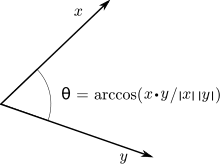

#### Interpretación 
Existen diversas interpretaciones de esta operación , algunas son :

* Que tan similares son 2 vectores: esto es útil en casos donde tengamos vectores de datos y necesitemos comparar su similitud.
* Proyectar un vector sobre otro: el producto punto es el tamaño de la proyección de un vector A sobre un vector B multiplicado por el tamaño del vector B
<img src="https://raw.githubusercontent.com/llealgt/Galileo_Python_DS/main/NumPy_algebra_lineal/dot_product.png">
* El producto punto es parte importante de la multiplicación de matrices(tema aún por desarrollar), una de las operaciones más importantes en AI a través de deep learning.


#### Usos y aplicaciones del producto punto

El producto punto tiene diversas aplicaciones en muchas ciencias, en ciencias de datos es muy utilizado y aplicado , por ejemplo:

* **En Machine Learning**:
    * En modelos lineales como regresión lineal o regresión lógistica es común guardar en un vector los parámetros de los modelos(aveces llamado W) y cuando queremos hacer inferencia sobre ciertos datos "x" almacenamos los datos "x" en un vector X y aplicamos la operación producto punto entre X y W.
    <img src="https://images.slideplayer.com/24/7356693/slides/slide_5.jpg">
    * Una interpretación geométrica del producto punto es que tan similares dos vectores son entre sí , las redes neuronales utilizan este principio  para definir multiples capas jerarquicas de "caraceterísticas"(representadas por neuronas) que buscar sobre ciertos datos de entrada X, estas  características  son definidas en vectores  por lo cual el producto punto es una medida de que tanto se parece cierto vector X a la característica que la neurona representa, un valor alto del producto punto indica alta similitud entre los datos X y la característica que la neurona "busca"
    <img src="https://miro.medium.com/max/816/1*BMSfafFNEpqGFCNU4smPkg.png">
    

#### Perpendicularidad 

Se dice que 2 vectores son perpendiculares si el producto punto entre ellos es igual a 0 ,geometricamente esto ocurre cuando los vectores se encuentran a 90 grados entre sí por lo cual en DS podemos interpretar que 2 vectores cuyo producto punto es 0, son vectores que difieren mucho por lo tanto son muy diferentes.


<img src="https://chortle.ccsu.edu/VectorLessons/vch07/acuteORobtuse.gif">
    
#### Producto punto en NumPy

En NumPy poseemos 2 maneras de calcular el producto punto sobre vectores de igual tamaño:

* np.dot:https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot
* np.inner:https://docs.scipy.org/doc/numpy/reference/generated/numpy.inner.html

**¿Por que 2 operaciones?** Estas operaciones son diferentes cuando se trabaja con Tensores de rango mayor a 1 y pueden ser "configurables" , para Tensores de rango=1(vectores de igual tamaño,nuestro tema actual) son equivalentes.

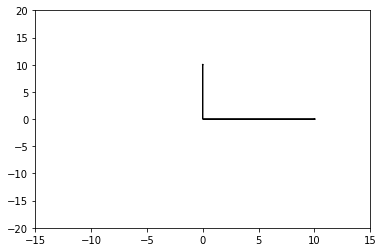

0


In [300]:
a = np.array([10,0]) #usuario1
b = np.array([0,10]) #usuario2

plt.arrow(0,0,a[0],a[1],head_width=0.1,head_length=0.1)
plt.arrow(0,0,b[0],b[1],head_width=0.1,head_length=0.1)
plt.xlim(-15,15)
plt.ylim(-20,20)
plt.show()

print(np.dot(a,b))

In [301]:
f = np.array([0.1,0.2,0.3])
g = np.array([1,2,3])

print(f.dot(g))
print(np.dot(f,g))

#print(g.inner(f)) # operacion no existente en NumPy
print(np.inner(g,f))

1.4
1.4
1.4


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [328]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

HL1 = [0.25, 0.37]
HL2 = [-8, 14]
OL = [4, 9]

def neural_network(x):
  HL_resultado = []
  HL_resultado.append(np.dot(x, HL1))
  HL_resultado.append(np.dot(x, HL2))

  return np.dot(HL_resultado, OL)

print(neural_network(X1))
print(neural_network(X2))
print(neural_network(X3))
print(neural_network(x4))
print(neural_network(X5))


56.2856
1176.36
0.0
56.48
-120.88416218495286


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [337]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)




### Constantes Numéricas importantes

Tal como NumPy provee funciones matemáticas comunes como logaritmos y funciones trigonométricas ,también posee constantes usadas comunmente en problemas numéricos , por ejemplo:

* **np.e** : constante de Euler, base de logaritmos naturales 2.71828...
* **np.pi** :el conocido número pi 3.1415.....
* **np.euler_gamma**: constante utilizada  por ejemplo en transformadas de Laplace , 0.5772....

Además de algunas constantes útiles en Python para indicar por ejemplo: infinito positivo, negativo o si el resultado de una operación no es un número definido.

* **np.inf**: infinito positivo
* **np.NINF** :infinito negativo
* **np.nan**: not a number


https://docs.scipy.org/doc/numpy-1.15.0/reference/constants.html

In [338]:
import numpy as np
print(np.e)
print(np.pi)
print(np.euler_gamma)

print(np.inf)
print(np.NINF)
print(np.nan)

2.718281828459045
3.141592653589793
0.5772156649015329
inf
-inf
nan


inf,NINF, y nan  se obtienen muchas veces al aplicar una operación matemática sobre cierto valor, por ejemplo logaritmos de números negativos es algo no definido por lo cual resulta en nan, o una división por 0 resulta en infinito.


In [339]:
x = np.array([-5.3,-1,0,1,1.5,10,100])

print(np.log(x))

[       nan        nan       -inf 0.         0.40546511 2.30258509
 4.60517019]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [340]:
numerador = np.array([5,4,9])
divisor = np.array([5,0,8])

numerador/divisor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


array([1.   ,   inf, 1.125])

In [341]:
x  = np.array([0.1,0.2,5,-2, 7])

print(np.sqrt(x))

[0.31622777 0.4472136  2.23606798        nan 2.64575131]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [342]:
np.inf <= 50

False

In [343]:
np.inf >= 1000000

True

In [344]:
np.NINF < 0

True

In [345]:
-1*np.inf == np.NINF

True

In [346]:
np.inf - 1

inf

In [347]:
np.inf/np.NINF

nan

### Operadores lógicos en vectores

Que pasa si necesitamos aplicar condiciones y validaciones al trabajar con vectores?

Por ejemplo:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

El siguiente código que refleja esta función da error.



In [307]:
def h(x):
    if x < 0:
        return 0.0
    elif 0 <= x <= 1:
        return 1.0
    else:
        return 0.0
    
x = np.array([-1,0.1,10])

#h(x)

Para resolver el problema anterior(entre otras cosas) NumPy provee el uso de operadores lógicos sobre tensores , estos se aplican "elemento por elemento" gracias al broadcasting, el resultado de estos es valores booleanos True o False para cada valor.

Nuevamente **es importante hacer uso del broadcasting y no hacerlo con ciclos**

In [348]:
x = np.linspace(-2,2,9)

y = x < 0

print(x,y)
print(len(x),len(y))

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ] [ True  True  True  True False False False False False]
9 9


### Usando vectores booleanos para acceder elementos en otros vectores

NumPy nos permite acceder vectores con otros vectores de tipo booleano,el resultado de esto es obtener de cierto vector solo los elementos cuya posición corresponde a un valor True en el vector booleano,
con la sintáxis que usabamos para hacer indexing, pero usando un vector booleano como índice
por ejemplo para el caso anterior:

In [349]:
print(x,y)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ] [ True  True  True  True False False False False False]


In [350]:
x[y]

array([-2. , -1.5, -1. , -0.5])

In [351]:
x[np.logical_not(y)]

array([0. , 0.5, 1. , 1.5, 2. ])

In [352]:
x

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

En este caso "y" es redundante y se pudo hacer:

In [353]:
x[x<0]

array([-2. , -1.5, -1. , -0.5])

Explicación: el aplicar x < 0 generó un vector que tiene los primeros 4 elementos como True , si usamos este vector booleano como indice del vector original x entonces obtenemos solo los elementos de x que estan asociados a elementos True en el vector booleano de indice, en este caso solo los primeros 4.

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [364]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2

print(x)

y = x < 0
negativos = x[y]
a_positivos = negativos * -1
x[y] = a_positivos

print(x)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [414]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    x[(x>=0) & (x<=1)] = 1
    x[x!=1] = 0

    ##
    return x

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1. 0. 1. 0.]


Para casos donde se requiere comportamiento parecido a este pero con mas condiciones, NumPy provee la función **np.select** , la descripción de esta función casi siempre es mas complicada de lo que debería y dificulta entenderla, vamos a buscar entenderla bajo un ejemplo.

Básicamente select se basa en :
* una lista de condiciones A
* una lista de valores a tomar según estas condiciones B
* un valor de  resultado default cuando ninguna de las condiciones en la  lista se cumple.
Estas 2 listas deben ser del mismo tamañaño.

In [401]:
x = np.arange(10)
condiciones = [x<3 , x>5] #lista A 
resultados =  [x,    x**2] #lista B

print(x)
#los valores de x que no satisfacen ningúna condicion obtendran 0 como resultado(este es el valor default)
np.select(condiciones,resultados) 

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  2,  0,  0,  0, 36, 49, 64, 81])

In [402]:
np.select(condiciones,resultados,-1) #podemos agregar un tercer parámetro para el valor default 

array([ 0,  1,  2, -1, -1, -1, 36, 49, 64, 81])

In [403]:
condiciones = [x<3]
resultados = [2]

np.select(condiciones,resultados)

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

Otro ejemplo

In [404]:
x = np.linspace(1,10,10)
condiciones = [x<4,x>=7]
resultados =  [x ,  x**2]
k = np.select(condiciones,resultados,-1)

print(x)
print(k)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   2.   3.  -1.  -1.  -1.  49.  64.  81. 100.]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [417]:
x = np.linspace(-5, 5, 15)

condiciones = [x<0, (x>=0)&(x<1), (x>=1)&(x<2)]
resultados = [-x, np.power(x,3), np.power(x,2)]
sel = np.select(condiciones, resultados, 4)

print(x)
print(sel)


[-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]
[5.         4.28571429 3.57142857 2.85714286 2.14285714 1.42857143
 0.71428571 0.         0.36443149 2.04081633 4.         4.
 4.         4.         4.        ]


##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo
    
#### Referencias

* https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html
* https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
* https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/
* https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf
* https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

In [ ]:
import numpy as np

np.random.randn(3)

array([0.61980049, 0.20208829, 2.39505977])

### Proyección Vectorial

### Producto Cruz